# Housing Unit Inventory Workflow

## Overview
Functions to obtain and clean data required for the version 2 Housing Unit Inventory. 
The workflow  replicates the original alpha version [Version 1]
of Housing Unit Inventory workflow in Python using Census API. 

The workflow also expands the Housing Unit Inventory to include
household income based on family and non-family income distributions 
by race and ethnicity.

For the original Alpha Release of the housing unit inventory 
process and example applications see:

Rosenheim, Nathanael (2021) “Detailed Household and Housing Unit Characteristics: Data and Replication Code.” DesignSafe-CI. 
https://doi.org/10.17603/ds2-jwf6-s535.

The 2010 Census Data provides detailed household and housing unit, 
level characteristics at the census block level. 

The 2012 5-year American Community Survey provides detailed 
household level characteristics at the census tract level.

The output of this workflow is a CSV file with the housing unit inventory and a codebook that describes the data.

The output CSV is designed to be used in the Interdependent Networked Community Resilience Modeling Environment (IN-CORE) for the housing unit allocation model.

IN-CORE is an open source python package that can be used to model the resilience of a community. To download IN-CORE, see:

https://incore.ncsa.illinois.edu/


## Instructions
Users can run the workflow by executing each block of code in the notebook.

Users can modify the code to select one county or multiple counties.

## Description of Program
- program:    ICD_06dv1_run_HUI_v2_workflow
- task:       Obtain and clean data for Housing Unit Inventory.
- See github commits for description of program updates
- Current Version:    2022-04-21 - preparing for publication
- project:    Interdependent Networked Community Resilience Modeling Environment (IN-CORE), Subtask 5.2 - Social Institutions
- funding:	  NIST Financial Assistance Award Numbers: 70NANB15H044 and 70NANB20H008 
- author:     Nathanael Rosenheim

- Suggested Citation:
Rosenheim, Nathanael (2021) “Detailed Household and Housing Unit Characteristics: Data and Replication Code.” DesignSafe-CI. 
https://doi.org/10.17603/ds2-jwf6-s535.

## Step 1: Select the County or Counties
The housing unit inventory functions run for individual counties in the United States. 
A county is selected by entering the county FIPS code in the data dictionary below.
Multiple counties can be selected by entering a list of county FIPS codes in the data dictionary.
- For each county include the county name, this is used in the codebook.
- For each community (1 county or a group of counties) include the community name, this is used in the codebook.


### Example of data dictionary for one community with one county
```
communities = {'Lumberton_NC' : {
                    'community_name' : 'Lumberton, NC',
                    'counties' : { 
                        1 : {'FIPS Code' : '37155', 'Name' : 'Robeson County, NC'}}}}
```

### Example of data dictionary for one community with multiple counties
```
communities = {'Joplin_MO' : {
                    'community_name' : 'Joplin, MO',
                    'counties' : { 
                        1 : {'FIPS Code' : '29097', 'Name' : 'Jasper County, MO'},
                        2 : {'FIPS Code' : '29145', 'Name' : 'Newton County, MO'}}}}
```

### How to locate your county FIPS code:
- County FIPS codes can be found online at [USDA County FIPS codes](https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697)
- Google search "FIPS code for county [county name]"

## Step 2: Edit the data dictionary
Modify the data dictionary below with your county FIPS Code, name and community name.

In [1]:
# Example of data dictionary for one community with one county
communities = {'Lumberton_NC' : {
                    'community_name' : 'Lumberton, NC',
                    'counties' : { 
                        1 : {'FIPS Code' : '37155', 'Name' : 'Robeson County, NC'}}}}

## Step 3: Run all of the code blocks in the notebook
To run all of the code blocks in the notebook, find the "Run All" option:
1. If there is a "Run All" button at the top of the notebook then click it.
2. Else, in the "Run" menu, select "Run All Cells"

After all of the code runs (approximately 2 minutes per 50,000 housing units), the output files (CSV and codebook) will be generated and saved in the folder "OutputData" in the directory where the notebook is saved.

The notebook produces a log file which can be reviewed to see the full workflow process. The workflow depends on internet access to the Census API, which is a publicly available service.


### Setup notebook environment to access Cloned Github Package
This notebook uses functions that are in development. The current version of the package is available at:

https://github.com/npr99/intersect-community-data

A permanent copy of the package is available in the DesignSafe-CI repository:

Rosenheim, Nathanael (2021) “Detailed Household and Housing Unit Characteristics: Data and Replication Code.” DesignSafe-CI. 
https://doi.org/10.17603/ds2-jwf6-s535.

In [2]:
import numpy as np
import pandas as pd
import os # For saving output to path
import sys
import scooby # Reports Python environment

In [3]:
# Generate report of Python environment
print(scooby.Report(additional=['pandas']))


--------------------------------------------------------------------------------
  Date: Fri Apr 22 12:27:33 2022 Central Daylight Time

                OS : Windows
            CPU(s) : 12
           Machine : AMD64
      Architecture : 64bit
               RAM : 31.6 GiB
       Environment : Jupyter

  Python 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 05:37:49)
  [MSC v.1916 64 bit (AMD64)]

            pandas : 1.3.5
             numpy : 1.21.6
             scipy : 1.7.3
           IPython : 7.32.0
        matplotlib : 3.5.1
            scooby : 0.5.12
--------------------------------------------------------------------------------


In [4]:
#To replicate this notebook Clone the Github Package to a folder that is a sibling of this notebook.
# To access the sibling package you will need to append the parent directory ('..') to the system path list.
# append the path of the directory that includes the github repository.
# This step is not required when the package is in a folder below the notebook file.
github_code_path  = ""
sys.path.append(github_code_path)

In [5]:
os.getcwd()

'c:\\Users\\nathanael99\\MyProjects\\IN-CORE\\Tasks\\PublishHUIv2\\HousingUnitInventories_2022-03-03\\ReplicationCode\\intersect-community-data'

In [6]:
# To reload submodules need to use this magic command to set autoreload on
%load_ext autoreload
%autoreload 2
# open, read, and execute python program with reusable commands
from pyhui.SourceData.api_census_gov.acg_05a_hui_functions \
    import hui_workflow_functions
from pyhui.ICD_00b_directory_design import directory_design
from pyhui.ICD_06c_Codebook import *
from pyhui.ICD_06b_Figures import *

from pyhui.SourceData.api_census_gov.acg_00e_incore_huiv2 \
    import incore_v2_DataStructure

In [7]:
version = '2.0.0'
version_text = 'v2-0-0'

# Save Outputfolder - due to long folder name paths output saved to folder with shorter name
# files from this program will be saved with the program name - 
# this helps to follow the overall workflow
outputfolder = "OutputData"
# Make directory to save output
if not os.path.exists(outputfolder):
    os.mkdir(outputfolder)

# Set random seed for reproducibility
seed = 1000
basevintage = 2010


Setting up Housing Unit Inventory for Lumberton, NC
Robeson County, NC : county FIPS Code 37155

***************************************
    Version control - list of installed packages
***************************************

# packages in environment at C:\Users\nathanael99\Miniconda3\envs\pyhui20220422:
#
# Name                    Version                   Build  Channel
argon2-cffi               21.3.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0           py37hcc03f2d_2    conda-forge
attrs                     21.4.0             pyhd8ed1ab_0    conda-forge
backcall                  0.2.0              pyh9f0ad1d_0    conda-forge
backports                 1.0                        py_2    conda-forge
backports.functools_lru_cache 1.6.4              pyhd8ed1ab_0    conda-forge
beautifulsoup4            4.11.1             pyha770c72_0    conda-forge
bleach                    5.0.0              pyhd8ed1ab_0    conda-forge
bottleneck                1.3.4    

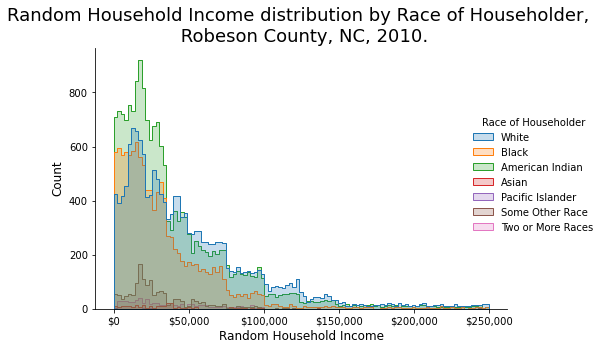

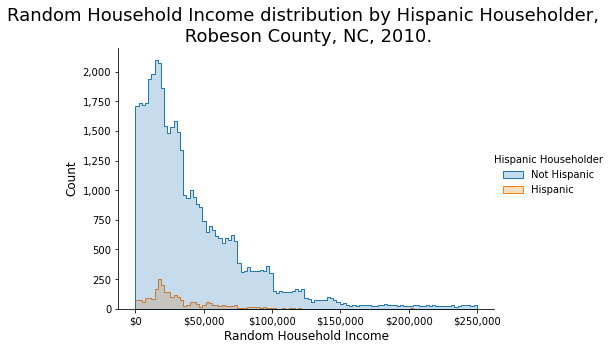

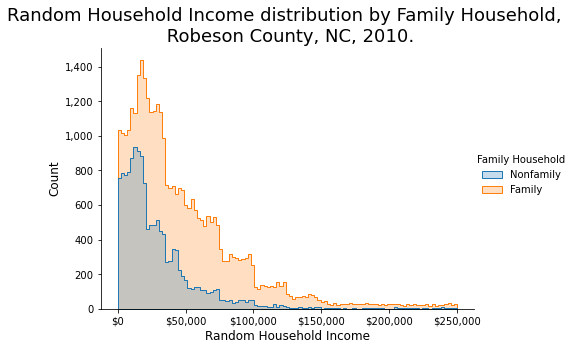

In [8]:
for community in communities.keys():
    # Create empty container to store outputs for in-core
    # Will use these to combine multiple counties
    hui_incore_county_df = {}
    print("Setting up Housing Unit Inventory for",communities[community]['community_name'])
    for county in communities[community]['counties'].keys():
        state_county = communities[community]['counties'][county]['FIPS Code']
        state_county_name  = communities[community]['counties'][county]['Name']
        print(state_county_name,': county FIPS Code',state_county)
    
        outputfolders = directory_design(state_county_name = state_county_name,
                                            outputfolder = outputfolder)
                                            
        generate_df = hui_workflow_functions(
            state_county = state_county,
            state_county_name= state_county_name,
            seed = seed,
            version = version,
            version_text = version_text,
            basevintage = basevintage,
            outputfolder = outputfolder,
            outputfolders = outputfolders)

        # Generate base housing unit inventory
        base_hui_df = generate_df.run_hui_workflow()
        hui_df = generate_df.final_polish_hui(base_hui_df['primary'])

        # Save version for IN-CORE in v2 format
        hui_incore_county_df[state_county] = \
            generate_df.save_incore_version2(hui_df)

    # combine multiple counties
    hui_incore_df = pd.concat(hui_incore_county_df.values(), 
                                    ignore_index=True, axis=0)

    # Remove .0 from data - helps reduce file size
    hui_incore_df_fixed = hui_incore_df.applymap(lambda cell: int(cell) if str(cell).endswith('.0') else cell)

    #Save results for community name
    output_filename = f'hui_{version_text}_{community}_{basevintage}_rs{seed}'
    csv_filepath = outputfolders['top']+"/"+output_filename+'.csv'
    savefile = sys.path[0]+"/"+csv_filepath
    hui_incore_df_fixed.to_csv(savefile, index=False)

    # Save second set of files in common directory
    common_directory = outputfolders['top']+"/../"+output_filename
    hui_incore_df_fixed.to_csv(common_directory+'.csv', index=False)
    
    # Generate figures for explore data
    figures_list = []
    for by_var in ["race","hispan","family"]:
        income_by_var_figure = income_distribution(input_df = hui_incore_df,
                        variable = "randincome",
                        by_variable = by_var,
                        datastructure = incore_v2_DataStructure,
                        communities= communities,
                        community = community,
                        year = basevintage,
                        outputfolders = outputfolders)
        filename = income_by_var_figure+".png"
        figures_list.append(filename)

    # Paths for codebook text
    sourcedata_filepath = "pyhui/SourceData/api_census_gov"
    keyterms_filepath = sourcedata_filepath+ \
            '/'+"acg_00a_keyterms.md"

    projectoverview_filepath = 'pyhui/'+ "ICD_00a_projectoverview.md"

    # Create PDF Codebook
    pdfcodebook = codebook(input_df = hui_incore_df_fixed,
            header_title = 'Housing Unit Inventory',
            datastructure = incore_v2_DataStructure,
            projectoverview = projectoverview_filepath,
            keyterms = keyterms_filepath,
            communities = communities,
            community = community,
            year = basevintage,
            output_filename = output_filename,
            outputfolders = outputfolders,
            figures = figures_list,
            image_path = 'IN-CORE_HRRC_Banner.png')
    pdf_codebook = pdfcodebook.create_codebook()



In [9]:
hui_incore_df.head()

,huid,blockid,bgid,tractid,FIPScounty,numprec,ownershp,race,hispan,family,vacancy,gqtype,incomegroup,hhinc,randincome,poverty
0,B371559601011003H001,371559601011003,371559601011,37155960101,37155,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,9651.0,1.0
1,B371559601011005H001,371559601011005,371559601011,37155960101,37155,1,1.0,1.0,0.0,0.0,0.0,0.0,3.0,2.0,19695.0,0.0
2,B371559601011006H001,371559601011006,371559601011,37155960101,37155,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,6215.0,1.0
3,B371559601011006H002,371559601011006,371559601011,37155960101,37155,1,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,13776.0,0.0
4,B371559601011007H006,371559601011007,371559601011,37155960101,37155,1,2.0,1.0,0.0,0.0,0.0,0.0,5.0,3.0,27398.0,0.0


In [10]:
# List of all communities available in IN-CORE
communities = {'Lumberton_NC' : {
                    'community_name' : 'Lumberton, NC',
                    'counties' : { 
                        1 : {'FIPS Code' : '37155', 'Name' : 'Robeson County, NC'}}},                   
                'Shelby_TN' : {
                    'community_name' : 'Memphis, TN',
                    'counties' : { 
                        1 : {'FIPS Code' : '47157', 'Name' : 'Shelby County, TN'}}},
                'Joplin_MO' : {
                    'community_name' : 'Joplin, MO',
                    'counties' : { 
                        1 : {'FIPS Code' : '29097', 'Name' : 'Jasper County, MO'},
                        2 : {'FIPS Code' : '29145', 'Name' : 'Newton County, MO'}}},
                'Seaside_OR' : {
                    'community_name' : 'Seaside, OR',
                    'counties' : { 
                        1 : {'FIPS Code' : '41007', 'Name' : 'Clatsop County, OR'}}},                   
                'Galveston_TX' : {
                    'community_name' : 'Galveston, TX',
                    'counties' : { 
                        1 : {'FIPS Code' : '48167', 'Name' : 'Galveston County, TX'}}},
                'Mobile_AL' : {
                    'community_name' : 'Mobile, AL',
                    'counties' : { 
                        1 : {'FIPS Code' : '01097', 'Name' : 'Mobile County, AL'}}}                    
                }